In [1]:
import pandas as pd
import country_converter as coco 
import re
import numpy as np
from fuzzywuzzy import process
import time


d:\工作\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Read table

In [2]:
raw_renters = pd.read_csv('renters_2025_05_20_1747760432.csv')

### Drop name, email and phone number columns

In [3]:
drop_renters = raw_renters.drop(['Name', 'Email', 'Phone Number'], axis = 1)
drop_renters

,ID,Profile Status,Client Name,Province,City,Postal Code,Country,Registered At,Verification Status,Is Deleted,...,Prefer Live With,Looking In Address,Looking In City,Looking In State,Looking In Postal Code,Looking For Start,Budget,Lease Term,Number Adults,Number Children
0,213,Active,Happipad,NaN,NaN,NaN,NaN,2019-07-15,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
1,216,Active,Happipad,NaN,NaN,NaN,NaN,2019-07-16,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
2,218,Active,Happipad,NaN,Kelowna,NaN,Canada,2019-07-17,NaN,No,...,NaN,"west kelowna, BC",NaN,BC,NaN,2019-11-01,NaN,1 month,NaN,NaN
3,255,Active,Happipad,NaN,test,NaN,canada,2019-08-02,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
4,256,Active,Happipad,NaN,Kelowna,NaN,Canada,2019-08-02,NaN,No,...,NaN,"Kelowna, BC",NaN,BC,NaN,2019-11-01,NaN,1 month,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20536,26608,Active,Happipad,Nova Scotia,NaN,NaN,NaN,2025-05-05,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
20537,26609,Active,Happipad,Ontario,NaN,NaN,NaN,2025-05-05,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
20538,26610,Active,Happipad,Ontario,Minesing,L0L1Y3,Canada,2025-05-05,NaN,No,...,no_preference,The University of British Columbia - Okanagan ...,NaN,BC,NaN,2025-08-01,900.0,12 months,NaN,NaN
20539,26611,Active,Happipad,Ontario,Ottawa,NaN,NaN,2025-05-05,NaN,No,...,no_preference,"Lambton College, Ottawa Campus, Hazel Street, ...",NaN,ON,NaN,2025-09-01,1000.0,12 months,NaN,NaN


### Standardize the Country column

In [4]:
cc = coco.CountryConverter()
drop_renters['Country_cleaned'] = cc.convert(names=drop_renters['Country'], to='name_short')
drop_renters['Country_cleaned'] = drop_renters['Country_cleaned'].replace('not found', pd.NA)
drop_renters = drop_renters.dropna(subset=['Country_cleaned'])

nan not found in ISO3
nan not found in ISO3
Kelowna not found in regex
BC not found in ISO2
BC not found in ISO2
BC not found in ISO2
B.c. not found in regex
Bc not found in ISO2
Brasil not found in regex
UAE not found in ISO3
BC not found in ISO2
British Columbia not found in regex
rutland not found in regex
Alberta not found in regex
BC not found in ISO2
Bc not found in ISO2
Kelowna not found in regex
Vernon not found in regex
BC not found in ISO2
Vancouver not found in regex
BC not found in ISO2
bc not found in ISO2
bc not found in ISO2
british columbia not found in regex
Kelowna not found in regex
Bc not found in ISO2
كندا not found in regex
Danmark not found in regex
Bc not found in ISO2
B.c. not found in regex
Bc not found in ISO2
British Columbia not found in regex
British Columbia not found in regex
Pandosy street not found in regex
Canadá not found in regex
British Columbia not found in regex
Bc not found in ISO2
Nanaimo not found in regex
British Columbia not found in regex
C

In [5]:
drop_renters

,ID,Profile Status,Client Name,Province,City,Postal Code,Country,Registered At,Verification Status,Is Deleted,...,Looking In Address,Looking In City,Looking In State,Looking In Postal Code,Looking For Start,Budget,Lease Term,Number Adults,Number Children,Country_cleaned
2,218,Active,Happipad,NaN,Kelowna,NaN,Canada,2019-07-17,NaN,No,...,"west kelowna, BC",NaN,BC,NaN,2019-11-01,NaN,1 month,NaN,NaN,Canada
3,255,Active,Happipad,NaN,test,NaN,canada,2019-08-02,NaN,No,...,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN,Canada
4,256,Active,Happipad,NaN,Kelowna,NaN,Canada,2019-08-02,NaN,No,...,"Kelowna, BC",NaN,BC,NaN,2019-11-01,NaN,1 month,NaN,NaN,Canada
5,257,Active,Happipad,BC,Vancouver,NaN,Canada,2019-08-02,NaN,No,...,ON,NaN,ON,NaN,2020-03-01,NaN,9 months,NaN,NaN,Canada
6,258,Active,Happipad,NaN,Barcelona,NaN,Spain,2019-08-02,NaN,No,...,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20476,26537,Active,Canada HomeShare,Ontario,toronto,M5J2H2,Canada,2025-04-30,NaN,No,...,"111 Richmond Street West, Toronto, ON, Canada",NaN,ON,NaN,2025-07-01,1500.0,6 months,NaN,NaN,Canada
20504,26569,Active,Happipad,Alberta,Edmonton,T6K0R3,Canada,2025-05-01,COMPLETE,No,...,"Edmonton, AB, Canada",NaN,AB,NaN,2025-05-02,1400.0,12 months,NaN,NaN,Canada
20528,26600,Active,Canada HomeShare,British Columbia,Burnaby,V5A1S6,Canada,2025-05-04,COMPLETE,No,...,"Coquitlam, BC, Canada",NaN,BC,NaN,2025-08-15,1500.0,6 months,NaN,NaN,Canada
20531,26603,Active,Happipad,Nova Scotia,Halifax,B3H2R1,Canada,2025-05-04,NaN,No,...,NaN,NaN,,NaN,2025-07-01,800.0,12 months,NaN,NaN,Canada


In [6]:
def clean_country(value):
    if isinstance(value, str):
        parts = [part.strip().title() for part in value.split('/')]
        return ' / '.join(parts)
    return value

In [7]:
drop_renters['Country_cleaned'] = drop_renters['Country'].apply(clean_country)

C:\Users\admin\AppData\Local\Temp\ipykernel_12624\2664669870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_renters['Country_cleaned'] = drop_renters['Country'].apply(clean_country)


In [8]:
manual_mapping = {
    # United States
    'Usa': 'United States',
    'Us': 'United States',
    'United States Of America': 'United States',

    # United Kingdom
    'Uk': 'United Kingdom',
    'England': 'United Kingdom',

    # Canada
    'Ca': 'Canada',
    'Can': 'Canada',
    'Canada, Bc': 'Canada',
    'Canada Bc': 'Canada',
    'Bc Canada': 'Canada',
    'Canada’S': 'Canada',
    'Canada ????????': 'Canada',
    'Canada L': 'Canada',
    'British Colombia': 'Canada',

    # China
    'Hk': 'China',
    'Hongkong': 'China',
    'Hksar': 'China',
    'Macau': 'China',
    'Taiwan': 'China',
    'Hong Kong' : 'China',

    # South Korea
    'Korea': 'South Korea',
    'Republic Of Korea': 'South Korea',
    'Korea, South': 'South Korea',

    # Vietnam
    'Viet Nam': 'Vietnam',

    # Italy
    'Italia': 'Italy',

    # Brazil
    'Br': 'Brazil',

    # Sri Lanka
    'Sl': 'Sri Lanka',

    # Dominican Republic
    'República Dominicana': 'Dominican Republic',

    # Cayman Islands
    'Grand Cayman Island': 'Cayman Islands'
}

drop_renters['Country_cleaned'] = drop_renters['Country_cleaned'].replace(manual_mapping)


C:\Users\admin\AppData\Local\Temp\ipykernel_12624\1336273433.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_renters['Country_cleaned'] = drop_renters['Country_cleaned'].replace(manual_mapping)


In [9]:
drop_renters['Country_cleaned'].unique()

array(['Canada', 'Spain', 'Argentina', 'Japan', 'Iran', 'Vietnam',
       'China', 'India', 'Bangladesh', 'Brazil', 'Philippines',
       'United States', 'South Korea', 'Germany', 'Italy', 'Sri Lanka',
       'United Kingdom', 'Azerbaijan', 'Zambia', 'Australia', 'France',
       'New Zealand', 'Egypt', 'Indonesia', 'Mexico', 'Colombia',
       'Pakistan', 'Malaysia', 'Singapore', 'Denmark', 'Saudi Arabia',
       'Ireland', 'Ukraine', 'Saint Kitts And Nevis', 'Jamaica',
       'Tunisia', 'Nigeria', 'Ghana', 'Switzerland', 'Honduras',
       'Zimbabwe', 'El Salvador', 'Turkey', 'Nepal', 'Chile', 'Thailand',
       'South Africa', 'Jordan', 'Venezuela', 'Austria',
       'United Arab Emirates', 'Peru', 'Ecuador', 'Bahamas', 'Kuwait',
       'Cameroon', 'Belgium', 'Costa Rica', 'Morocco', 'Bermuda', 'Kenya',
       'Portugal', 'Dominican Republic', 'Qatar', 'Ethiopia', 'Uganda',
       'Mongolia', 'Uruguay', 'Russia', 'Armenia', 'Cayman Islands',
       'Papua New Guinea', 'Senegal', 'O

### Standardize Province

In [10]:
drop_renters['Province'].unique()

array([nan, 'BC', 'British Columbia', 'Bc', 'ON', 'Alberta',
       'North Rhine Westphalia', 'CA', 'QC', 'alberta', 'AZ', 'Karnataka',
       'Ontario', 'Tamil Nadu', 'CA-AB', 'AB', 'Manitoba', 'Tehran',
       'Gyeongsangnam-do', 'Nova Scotia', 'Qubec', 'Paschim Vihar', 'NF',
       'Almaty', 'NS', 'Maharashtra', 'Harare', 'Saskatchewan', 'Aargau',
       'IDF', 'Andhra Pradesh', 'Sask', 'British Colombia', 'Mexico City',
       'Haryana', 'Estado de Mexico', 'Punjab', 'Gujarat', 'Masvingo',
       'New Brunswick', 'Newfoundland', 'BRITISH COLUMBIA',
       'Nordrhein-Westfalen', 'GUJARAT', 'Puglia', 'Quebec', 'Gandaki',
       'ontario', 'Imo State', 'Cundinamarca', 'Shanghai',
       'Valle del Cauca', 'Durango', 'Beijing', 'Saga', 'Outside USA',
       'Illinois', 'Villa alemana', 'Lagos', 'Laguna', 'Goa', 'bc',
       'Choose...', 'Ondo', 'Washington', 'SK', 'Guayas', '1', 'Arizona',
       'Ab', 'Gauteng', 'NL', 'Metro Manila', 'Bay of Plenty', 'Sichuan',
       'Greater Accra',

In [11]:
invalid_values = ['', 'choose...', 'outside usa', '1']

drop_renters['Province_cleaned'] = drop_renters['Province'].astype(str).str.strip()
drop_renters['Province_cleaned_lower'] = drop_renters['Province_cleaned'].str.lower()

drop_renters = drop_renters[
    drop_renters['Province_cleaned_lower'].notna() &
    ~drop_renters['Province_cleaned_lower'].str.isnumeric() &
    ~drop_renters['Province_cleaned_lower'].isin(invalid_values)
]

drop_renters['Province_cleaned'] = drop_renters['Province_cleaned'].str.title()

valid_countries = drop_renters['Country_cleaned'].dropna().astype(str).unique()

drop_renters = drop_renters[
    ~drop_renters['Province_cleaned'].isin(valid_countries)
]


C:\Users\admin\AppData\Local\Temp\ipykernel_12624\3401202271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_renters['Province_cleaned'] = drop_renters['Province'].astype(str).str.strip()
C:\Users\admin\AppData\Local\Temp\ipykernel_12624\3401202271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_renters['Province_cleaned_lower'] = drop_renters['Province_cleaned'].str.lower()
C:\Users\admin\AppData\Local\Temp\ipykernel_12624\3401202271.py:12: SettingWithCopyWarning: 
A value is trying to be

In [12]:
drop_renters['Province_cleaned'].unique()

array(['Nan', 'Bc', 'British Columbia', 'On', 'Alberta',
       'North Rhine Westphalia', 'Ca', 'Qc', 'Az', 'Karnataka', 'Ontario',
       'Tamil Nadu', 'Ca-Ab', 'Ab', 'Manitoba', 'Tehran',
       'Gyeongsangnam-Do', 'Nova Scotia', 'Qubec', 'Paschim Vihar', 'Nf',
       'Almaty', 'Ns', 'Maharashtra', 'Harare', 'Saskatchewan', 'Aargau',
       'Idf', 'Andhra Pradesh', 'Sask', 'British Colombia', 'Mexico City',
       'Haryana', 'Estado De Mexico', 'Punjab', 'Gujarat', 'Masvingo',
       'New Brunswick', 'Newfoundland', 'Nordrhein-Westfalen', 'Puglia',
       'Quebec', 'Gandaki', 'Imo State', 'Cundinamarca', 'Shanghai',
       'Valle Del Cauca', 'Durango', 'Beijing', 'Saga', 'Illinois',
       'Villa Alemana', 'Lagos', 'Laguna', 'Goa', 'Ondo', 'Washington',
       'Sk', 'Guayas', 'Arizona', 'Gauteng', 'Nl', 'Metro Manila',
       'Bay Of Plenty', 'Sichuan', 'Greater Accra', 'Atlantageorgia',
       'Misamis Oriental', 'Hessen', 'Merkaz', 'Jawa Timur', 'Selangor',
       'Fars', 'Lima', '

In [13]:
province_mapping = {
    # Canadian provinces and abbreviations
    'Bc': 'British Columbia',                      # BC abbreviation variants
    'British  Columbia': 'British Columbia',       # Extra spaces fix
    'British Colombia': 'British Columbia',        # Common misspelling
    'Ns Canada': 'Nova Scotia',                     # Province with extra country tag
    'Ns': 'Nova Scotia',
    'Nf': 'Newfoundland',
    'Nl': 'Newfoundland',
    'Nb': 'New Brunswick',
    'Mb': 'Manitoba',
    'On': 'Ontario',
    'Ontario': 'Ontario',
    'Sk': 'Saskatchewan',
    'Sask': 'Saskatchewan',
    'Qc': 'Quebec',
    'Qubec': 'Quebec',                              # Misspelling fix
    'Quebec': 'Quebec',
    'Albert': 'Alberta',                            # Misspelling/typo
    'Alberta': 'Alberta',
    'Ca-Ab': 'Alberta', 

    # US states and abbreviations
    'Ca': 'California',                         
    'Az': 'Arizona',
    'Arizona': 'Arizona',
    'Il': 'Illinois',
    'Illinois': 'Illinois',
    'Ny': 'New York',
    'New York': 'New York',
    'Washington': 'Washington',

    # German states (Länder)
    'North Rhine Westphalia': 'North Rhine-Westphalia',  # English full name with hyphen
    'Nordrhein-Westfalen': 'North Rhine-Westphalia',     # German name mapped to English
    'Northrhine-Westfalia': 'North Rhine-Westphalia',    # Misspelling fix
    'Rheinland Pfalz': 'Rhineland-Palatinate',
    'Lower Saxony': 'Lower Saxony',
    'Hessen': 'Hesse',

    # Indian states
    'Karnataka': 'Karnataka',
    'Tamil Nadu': 'Tamil Nadu',
    'Tamilnadu': 'Tamil Nadu',                        # Spacing fix
    'Andhra Pradesh': 'Andhra Pradesh',
    'Madhya Pradesh': 'Madhya Pradesh',
    'Punjab': 'Punjab',
    'Haryana': 'Haryana',
    'Gujarat': 'Gujarat',
    'GUJARAT': 'Gujarat',                            # Uppercase fix
    'Maharashtra': 'Maharashtra',
    'Uttar Pradesh': 'Uttar Pradesh',

    # Mexican states and cities
    'Mexico City': 'Mexico City',
    'Estado De Mexico': 'State of Mexico',
    'Morelos': 'Morelos',
    'Jalisco': 'Jalisco',
    'Durango': 'Durango',

    # Colombian departments
    'Bogota': 'Bogotá',
    'Valle Del Cauca': 'Valle del Cauca',
    'Norte De Santander': 'Norte de Santander',
    'Cundinamarca': 'Cundinamarca',
    'Antioquia': 'Antioquia',
    'Arauca': 'Arauca',

    # Other countries and regions
    'Tehran': 'Tehran',
    'Gyeongsangnam-Do': 'Gyeongsangnam-do',
    'Shanghai': 'Shanghai',
    'Bay Of Plenty': 'Bay of Plenty',
    'Sichuan': 'Sichuan',
    'Greater Accra': 'Greater Accra',
    'Gauteng': 'Gauteng',
    'Misamis Oriental': 'Misamis Oriental',
    'Jawa Timur': 'East Java',
    'Selangor': 'Selangor',
    'Fars': 'Fars',
    'Lima': 'Lima',
    'Yukon': 'Yukon',
    'Carabobo': 'Carabobo',
    'Zug': 'Zug',
    'Kingston': 'Kingston',
    'Federal Capital Territory': 'Federal Capital Territory',
    'Victoria': 'Victoria',
    'Krems': 'Krems',
    'Province 3 ( प्रदेश नं ३ )': 'Province 3',          # Province 3 in Nepal
    'Province 3': 'Province 3',
    'Alpes Maritimes': 'Alpes-Maritimes',
    'Spanish Town': 'Spanish Town',
    'Kanagawa-Ken': 'Kanagawa',
    'New Territories': 'New Territories',
    'Shandong': 'Shandong',
    'Isfahan': 'Isfahan',
    'Giza': 'Giza',
    'Hebei': 'Hebei',
    'Bagmati': 'Bagmati',
    'Kathmandu': 'Kathmandu',
    'Akita Prefecture': 'Akita Prefecture',
    'Pe': 'Prince Edward Island',                      # PE abbreviation for Canadian province
    'North Western Province': 'North Western Province',
    'Kowloon': 'Kowloon',
    'Mashonaland East': 'Mashonaland East',
    'Yunnan': 'Yunnan',
    'Chisinau': 'Chișinău',
    'St Andrew': 'St Andrew',
    'Nouvelle Aquitaine': 'Nouvelle-Aquitaine',
    'Dubai': 'Dubai',
    'Western Australia': 'Western Australia',
    'Northamptonshire': 'Northamptonshire',
    'Worcestershire': 'Worcestershire',

    # Miscellaneous / unclear
    'Atlantageorgia': 'Atlanta, Georgia',               # Compound city + state
    'Villa Alemana': 'Villa Alemana',
    'Paschim Vihar': 'Paschim Vihar',
    'Harare': 'Harare',
    'Lagos': 'Lagos',
    'Laguna': 'Laguna',
    'Goa': 'Goa',
    'Ondo': 'Ondo',
    'Guayas': 'Guayas',
    'Metro Manila': 'Metro Manila',
    'Merkaz': 'Merkaz',
    'Morelos': 'Morelos',
    'Saga': 'Saga',
}


In [14]:
drop_renters['Province_cleaned'] = drop_renters['Province_cleaned'].replace(province_mapping)

In [15]:
drop_renters['Province_cleaned'].unique()

array(['Nan', 'British Columbia', 'Ontario', 'Alberta',
       'North Rhine-Westphalia', 'California', 'Quebec', 'Arizona',
       'Karnataka', 'Tamil Nadu', 'Ab', 'Manitoba', 'Tehran',
       'Gyeongsangnam-do', 'Nova Scotia', 'Paschim Vihar', 'Newfoundland',
       'Almaty', 'Maharashtra', 'Harare', 'Saskatchewan', 'Aargau', 'Idf',
       'Andhra Pradesh', 'Mexico City', 'Haryana', 'State of Mexico',
       'Punjab', 'Gujarat', 'Masvingo', 'New Brunswick', 'Puglia',
       'Gandaki', 'Imo State', 'Cundinamarca', 'Shanghai',
       'Valle del Cauca', 'Durango', 'Beijing', 'Saga', 'Illinois',
       'Villa Alemana', 'Lagos', 'Laguna', 'Goa', 'Ondo', 'Washington',
       'Guayas', 'Gauteng', 'Metro Manila', 'Bay of Plenty', 'Sichuan',
       'Greater Accra', 'Atlanta, Georgia', 'Misamis Oriental', 'Hesse',
       'Merkaz', 'East Java', 'Selangor', 'Fars', 'Lima', 'Yukon',
       'Jalisco', 'Carabobo', 'Zug', 'Kingston', 'Morelos',
       'Federal Capital Territory', 'Bogotá', 'Victoria'

### Standardize City

In [16]:
drop_renters1 = raw_renters.drop(['Name', 'Email', 'Phone Number'], axis = 1)
drop_renters1

,ID,Profile Status,Client Name,Province,City,Postal Code,Country,Registered At,Verification Status,Is Deleted,...,Prefer Live With,Looking In Address,Looking In City,Looking In State,Looking In Postal Code,Looking For Start,Budget,Lease Term,Number Adults,Number Children
0,213,Active,Happipad,NaN,NaN,NaN,NaN,2019-07-15,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
1,216,Active,Happipad,NaN,NaN,NaN,NaN,2019-07-16,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
2,218,Active,Happipad,NaN,Kelowna,NaN,Canada,2019-07-17,NaN,No,...,NaN,"west kelowna, BC",NaN,BC,NaN,2019-11-01,NaN,1 month,NaN,NaN
3,255,Active,Happipad,NaN,test,NaN,canada,2019-08-02,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
4,256,Active,Happipad,NaN,Kelowna,NaN,Canada,2019-08-02,NaN,No,...,NaN,"Kelowna, BC",NaN,BC,NaN,2019-11-01,NaN,1 month,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20536,26608,Active,Happipad,Nova Scotia,NaN,NaN,NaN,2025-05-05,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
20537,26609,Active,Happipad,Ontario,NaN,NaN,NaN,2025-05-05,NaN,No,...,NaN,NaN,NaN,,NaN,NaN,NaN,1 month,NaN,NaN
20538,26610,Active,Happipad,Ontario,Minesing,L0L1Y3,Canada,2025-05-05,NaN,No,...,no_preference,The University of British Columbia - Okanagan ...,NaN,BC,NaN,2025-08-01,900.0,12 months,NaN,NaN
20539,26611,Active,Happipad,Ontario,Ottawa,NaN,NaN,2025-05-05,NaN,No,...,no_preference,"Lambton College, Ottawa Campus, Hazel Street, ...",NaN,ON,NaN,2025-09-01,1000.0,12 months,NaN,NaN


In [17]:
def extract_city(address):
    if pd.isna(address):
        return address
    parts = address.split(',')
    if len(parts) > 1:
        return parts[-1].strip()
    else:
        return address.strip()

In [18]:
drop_renters1['City_extracted'] = drop_renters1['City'].apply(extract_city)

drop_renters1['City_extracted'] = drop_renters1['City_extracted'].str.title()
drop_renters1 = drop_renters1[~drop_renters1['City_extracted'].isin(drop_renters['Country_cleaned'].unique())]
drop_renters1 = drop_renters1[~drop_renters1['City_extracted'].isin(drop_renters['Province_cleaned'].unique())]

In [19]:
import numpy as np

your_array = drop_renters1['City_extracted'].unique()

# Set threshold to a large number to display the entire array
np.set_printoptions(threshold=np.inf)
print(your_array)


[nan 'Kelowna' 'Test' 'Vancouver' 'Barcelona' 'Toronto' 'West Kelowna'
 'Caba' 'Holbrook Rd W' 'Ok Falls' 'Fort St John' 'Kanazawa' 'Ho Chi Minh'
 'Whitby' 'Jinan' 'Chennai' 'Dhaka' 'Mumbai' 'Belo Horizonte' 'Chang'
 'Calgary' 'London' 'New Delhi' 'Bacolod City' 'Abbotsford' 'Burlington'
 'Quezon City' 'Bc' 'Lake Country' 'Seoul' 'Nanaimo' 'Manila' 'Vernon'
 'Bangalore' 'Surrey' 'Kamrup' 'Stuttgart' 'Grande Prairie' 'Oliver'
 'Sooke B.C' 'Tehan' 'North Vancouver' 'Napoli' 'New Westminster'
 'Belleville' 'Powell River' 'Taipei' 'Nagpur' 'Nanaimo Bc'
 'Niagara Falls' 'Mossoró' 'Hk' 'Antigonish' 'Westbank' 'Beaverdell'
 'Ratmalana' 'Alzey' 'Nelson' 'Squamish' 'Edmonton' 'Hong Kong'
 'Penticton' 'Naniamo' 'Trail' 'West Vancouver' 'Ss Marie'
 'Campbell River' 'Nova Scotia - Looking To Relocate To Bc' 'Montrose Bc'
 'Nanoose Bay' 'Richmond' 'Burnaby' 'Vernon Bc' 'Baku' 'Delta' 'Oshawa'
 'Sioux Lookout' 'Mississauga' 'Basingstoke' 'Denare Beach'
 'Port Coquitlam' 'Langley' 'Pitt Meadows' 'Coq

In [20]:
city_unique = drop_renters1['City_extracted'].unique()
province_and_non_city = set([
    'Ontario', 'Alberta', 'Bc', 'Bc.', 'Ont', 'Ont.', 'AB', 'BC', 'ON',
    'Haldimand County', 'County', 'Rd', 'Road', 'Street', 'St', 'Ave', 'Avenue',
    'Lane', 'Dr', 'Drive', 'Highway', 'Hwy', 'House', 'Mile', 'Mt.', 'Mount',
    '', 'Rr1 Mt. Elgin', 'City', 'Town', 'Village', 'Region', 'District'
])

spelling_corrections = {
    'Kelowma': 'Kelowna',
    'Mississuaga': 'Mississauga',
    'Prince Georee': 'Prince George',
    'Whitehose': 'Whitehorse',
    'Fort Mcmurray': 'Fort McMurray',
    '150 Mile': '150 Mile House',
    'North Vancouver': 'North Vancouver', 
    'West Vancouver': 'West Vancouver',
    '基洛纳': 'Kelowna',
    '溫哥華': 'Vancouver',
    '토론토': 'Toronto',
    '萨尼亚':'Sarnia',
    '哈利法克斯': 'Halifax',
    'バンクーバー ': 'Vancouver',
    'Ванкувер':'Vancouver',
    'Оттава':'Ottawa',
    'Галіфакс':'Halifax',
    'トロント':'Toronto',
    '킬로나':'Kelowna',
    'Westbank':'West Kelowna',
    'Scarborough' :'Toronto',
    'Etobicoke' : 'Toronto',
    'Hull' : 'Gatineau'
}

def is_non_city(city):
    city = city.lower()
    for word in province_and_non_city:
        if re.search(r'\b' + re.escape(word.lower()) + r'\b', city):
            return True
    return False

def clean_city(city):
    if pd.isna(city):
        return None
    city = city.strip()
    if city == '':
        return None

    if city in spelling_corrections:
        city = spelling_corrections[city]

    if is_non_city(city):
        return None

    parts = city.split()
    if len(parts) > 2:
        city = ' '.join(parts[:2])

    if is_non_city(city):
        return None


    match, score = process.extractOne(city, city_unique)
    if score >= 85 and match != city:
        city = match

    return city

In [21]:
drop_renters1['City_cleaned'] = drop_renters1['City_extracted'].apply(clean_city)

In [22]:
drop_renters1['City_extracted'].unique()

array([nan, 'Kelowna', 'Test', 'Vancouver', 'Barcelona', 'Toronto',
       'West Kelowna', 'Caba', 'Holbrook Rd W', 'Ok Falls',
       'Fort St John', 'Kanazawa', 'Ho Chi Minh', 'Whitby', 'Jinan',
       'Chennai', 'Dhaka', 'Mumbai', 'Belo Horizonte', 'Chang', 'Calgary',
       'London', 'New Delhi', 'Bacolod City', 'Abbotsford', 'Burlington',
       'Quezon City', 'Bc', 'Lake Country', 'Seoul', 'Nanaimo', 'Manila',
       'Vernon', 'Bangalore', 'Surrey', 'Kamrup', 'Stuttgart',
       'Grande Prairie', 'Oliver', 'Sooke B.C', 'Tehan',
       'North Vancouver', 'Napoli', 'New Westminster', 'Belleville',
       'Powell River', 'Taipei', 'Nagpur', 'Nanaimo Bc', 'Niagara Falls',
       'Mossoró', 'Hk', 'Antigonish', 'Westbank', 'Beaverdell',
       'Ratmalana', 'Alzey', 'Nelson', 'Squamish', 'Edmonton',
       'Hong Kong', 'Penticton', 'Naniamo', 'Trail', 'West Vancouver',
       'Ss Marie', 'Campbell River',
       'Nova Scotia - Looking To Relocate To Bc', 'Montrose Bc',
       'Nanoose B

### Standardize Looking In State

In [23]:
drop_renters1['Looking In State'].unique()

array([' ', 'BC', 'ON', 'AB', 'QC', 'SK', 'PE', 'MB', 'NS', 'NB', 'NU',
       'NL', nan, 'NT'], dtype=object)

### Stanadardize Looking In Address

In [24]:
cities_df = pd.read_csv('canadacities.csv')
cities = cities_df["city"]
cities = ['West Kelowna' if city == 'Westbank' else city for city in cities]
cities.extend(["Langley Township", "Revelstoke", "Lower Sackville", "Middle Sackville", "Upper Sackville", "Okanagan Falls", "Lower Truro", "Greater Sudbury", "Stayner", "Windsor Junction","Revelstoke",'Richmond Hill', 'Okanagan', 'Bedford', 'Bible Hill', 'Lower Sackville', 'Port Hawkesbury', 'Windsor', 'Scarborough', 'Lower Sackville'])
cities = [c.lower() for c in cities]

In [25]:
def extract_city(address, cities):
    if isinstance(address, str) and address.strip():
        city_set = set(city.lower() for city in cities)
        parts = [part.strip().lower() for part in address.split(',') if part.strip()]
        for part in reversed(parts): 
            if part in city_set:
                for city in cities:
                    if city.lower() == part:
                        return city
    return None

In [26]:
from tqdm import tqdm
tqdm.pandas()
drop_renters1['Looking In City_extracted'] = drop_renters1['Looking In Address'].progress_apply(lambda x: extract_city(x, cities))

100%|██████████| 19993/19993 [00:07<00:00, 2578.85it/s]


In [27]:
drop_renters1['Looking In City_extracted'].unique()

array([None, 'west kelowna', 'kelowna', 'toronto', 'vancouver',
       'lake country', 'vernon', 'new westminster', 'powell river',
       'abbotsford', 'parksville', 'nanaimo', 'okanagan', 'surrey',
       'edmonton', 'cape breton', 'burnaby', 'richmond', 'victoria',
       'langley', 'oak bay', 'penticton', 'nelson', 'calgary',
       'white rock', 'courtenay', 'valleyview', 'north vancouver',
       'kamloops', 'leduc', 'mississauga', 'prince george', 'merritt',
       'london', 'revelstoke', 'duncan', 'delta', 'castlegar',
       'thunder bay', 'sudbury', 'airdrie', 'orangeville', 'chilliwack',
       'vaughan', 'port moody', 'coquitlam', 'barrie', 'markham',
       'ottawa', 'pincourt', 'sainte-adèle', 'sainte-agathe-des-monts',
       'falmouth', 'maple ridge', 'niagara falls', 'halifax', 'chetwynd',
       'west vancouver', 'sarnia', 'richmond hill', 'halton hills',
       'brampton', 'oshawa', 'squamish', 'bradford west gwillimbury',
       'deux-montagnes', 'port coquitlam', '

In [28]:
df_ref = cities_df[['city', 'province_id']].copy()

df_ref['city'] = df_ref['city'].apply(lambda x: 'West Kelowna' if x == 'Westbank' else x)
df_ref.loc[df_ref['city'].isin(['Richmond', 'Victoria', 'Armstrong']), 'province_id'] = 'BC'
df_ref.loc[df_ref['city'].isin(['Richmond Hill', 'Waterloo', 'Alliston', 'Lambton', 'Rosedale', 'Lakeshore']), 'province_id'] = 'ON'
df_ref.loc[df_ref['city'].isin(['St. Andrews', 'Woodstock', 'Perth-Andover']), 'province_id'] = 'NB'
df_ref.loc[df_ref['city'].isin(['Cochrane']), 'province_id'] = 'AB'
df_ref.loc[df_ref['city'].isin(['Windsor', 'Dalhousie University', 'Bedford', 'Amherst', 'Westmount']), 'province_id'] = 'NS'
extra_city_province = {
    "Langley Township": "BC",
    "Revelstoke": "BC",
    "Lower Sackville": "NS",
    "Middle Sackville": "NS",
    "Upper Sackville": "NS",
    "Okanagan Falls": "BC",
    "Lower Truro": "NS",
    "Greater Sudbury": "ON",
    "Stayner": "ON",
    "Windsor Junction": "NS",
    'Revelstoke' : 'BC',
    'Okanagan' :'BC',
    'Bible Hill': 'NS',
    'Lower Sackville': 'NS',
    'Port Hawkesbury' :'NS',
    'Scarborough': 'ON',
    'Bedford' : 'NS',
    'Durham' : 'ON'
}


df_extra = pd.DataFrame({
    'city': list(extra_city_province.keys()),
    'province_id': list(extra_city_province.values())
})


df_final = pd.concat([df_ref, df_extra], ignore_index=True)
#df_final


In [29]:
df_final['city'] = df_final['city'].str.lower()
df_final['province_id'] = df_final['province_id'].str.lower()

drop_renters1['city_lower'] = drop_renters1['Looking In City_extracted'].str.lower()
drop_renters1['state_lower'] = drop_renters1['Looking In State'].str.lower()

merged = drop_renters1.merge(df_final, how='left', left_on='city_lower', right_on='city')

merged['province_match'] = merged['state_lower'] == merged['province_id']

mismatch = merged[merged['province_match'] == False]

#mismatch[['Looking In City_extracted', 'Looking In State', 'province_id']]['Looking In City_extracted'].unique()

In [30]:
# target_cities = [
#    'toronto', 'kelowna', 'vancouver', 'vernon', 'parksville',
#        'nanaimo', 'okanagan', 'surrey', 'abbotsford', 'cape breton',
#        'richmond', 'victoria', 'langley', 'burnaby', 'oak bay',
#        'north vancouver', 'penticton', 'saskatoon', 'castlegar',
#        'coquitlam', 'nelson', 'west kelowna', 'oakville', 'lake country',
#        'summerland', 'kamloops', 'shelburne', 'windsor', 'ottawa',
#        'halifax', 'yarmouth', 'guelph', 'montréal', 'saint marys',
#        'timmins', 'fredericton', 'drumheller', 'stratford', 'belleville',
#        'charlottetown', 'durham', 'sarnia', 'bedford', 'miramichi',
#        'moncton', 'cumberland', 'trail'
# ]

# target_cities_lower = [c.lower() for c in target_cities]

# mismatch_target = mismatch[mismatch['city_lower'].isin(target_cities_lower)]


# filtered = mismatch_target[mismatch_target['city_lower'].isin(target_cities_lower)]

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)
# filtered

In [31]:
merged['province_id_upper'] = merged['province_id'].str.upper()
merged['Looking In State_cleaned'] = merged['Looking In State']
condition = (merged['province_match'] == False) & (merged['Looking In City_extracted'].notna())
merged.loc[condition, 'Looking In State_cleaned'] = merged.loc[condition, 'province_id_upper']

In [32]:
merged

,ID,Profile Status,Client Name,Province,City,Postal Code,Country,Registered At,Verification Status,Is Deleted,...,City_extracted,City_cleaned,Looking In City_extracted,city_lower,state_lower,city,province_id,province_match,province_id_upper,Looking In State_cleaned
0,213,Active,Happipad,NaN,NaN,NaN,NaN,2019-07-15,NaN,No,...,NaN,None,None,None,,NaN,NaN,False,NaN,
1,216,Active,Happipad,NaN,NaN,NaN,NaN,2019-07-16,NaN,No,...,NaN,None,None,None,,NaN,NaN,False,NaN,
2,218,Active,Happipad,NaN,Kelowna,NaN,Canada,2019-07-17,NaN,No,...,Kelowna,None,west kelowna,west kelowna,bc,west kelowna,bc,True,BC,BC
3,255,Active,Happipad,NaN,test,NaN,canada,2019-08-02,NaN,No,...,Test,None,None,None,,NaN,NaN,False,NaN,
4,256,Active,Happipad,NaN,Kelowna,NaN,Canada,2019-08-02,NaN,No,...,Kelowna,None,kelowna,kelowna,bc,kelowna,bc,True,BC,BC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20213,26608,Active,Happipad,Nova Scotia,NaN,NaN,NaN,2025-05-05,NaN,No,...,NaN,None,None,None,,NaN,NaN,False,NaN,
20214,26609,Active,Happipad,Ontario,NaN,NaN,NaN,2025-05-05,NaN,No,...,NaN,None,None,None,,NaN,NaN,False,NaN,
20215,26610,Active,Happipad,Ontario,Minesing,L0L1Y3,Canada,2025-05-05,NaN,No,...,Minesing,None,kelowna,kelowna,bc,kelowna,bc,True,BC,BC
20216,26611,Active,Happipad,Ontario,Ottawa,NaN,NaN,2025-05-05,NaN,No,...,Ottawa,None,ottawa,ottawa,on,ottawa,on,True,ON,ON


### Output

In [33]:
merged.to_csv('cleaned_renters.csv', index=False, encoding='utf-8')
drop_renters.to_csv('cleaned_country_renters.csv', index=False, encoding='utf-8')

### EDA

In [34]:
renters = pd.read_csv('cleaned_renters.csv')
renters_country =  pd.read_csv('cleaned_country_renters.csv')

In [35]:
renters.describe()

,ID,Looking In City,Looking In Postal Code,Budget,Number Adults,Number Children,City_cleaned
count,20218.000000,0.0,0.0,10233.000000,0.0,0.0,0.0
mean,12797.862449,NaN,NaN,1097.323170,NaN,NaN,NaN
std,7485.082354,NaN,NaN,569.314719,NaN,NaN,NaN
min,213.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,6400.250000,NaN,NaN,800.000000,NaN,NaN,NaN
50%,12580.500000,NaN,NaN,1000.000000,NaN,NaN,NaN
75%,19055.750000,NaN,NaN,1300.000000,NaN,NaN,NaN
max,26612.000000,NaN,NaN,10000.000000,NaN,NaN,NaN


In [36]:
renters.columns

Index(['ID', 'Profile Status', 'Client Name', 'Province', 'City',
       'Postal Code', 'Country', 'Registered At', 'Verification Status',
       'Is Deleted', 'Gender', 'Prefer Live With', 'Looking In Address',
       'Looking In City', 'Looking In State', 'Looking In Postal Code',
       'Looking For Start', 'Budget', 'Lease Term', 'Number Adults',
       'Number Children', 'City_extracted', 'City_cleaned',
       'Looking In City_extracted', 'city_lower', 'state_lower', 'city',
       'province_id', 'province_match', 'province_id_upper',
       'Looking In State_cleaned'],
      dtype='object')

#### Gender Distribution

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors

C:\Users\admin\AppData\Local\Temp\ipykernel_12624\3091541122.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Gender', y='Percentage', data=gender_df, palette='pastel')


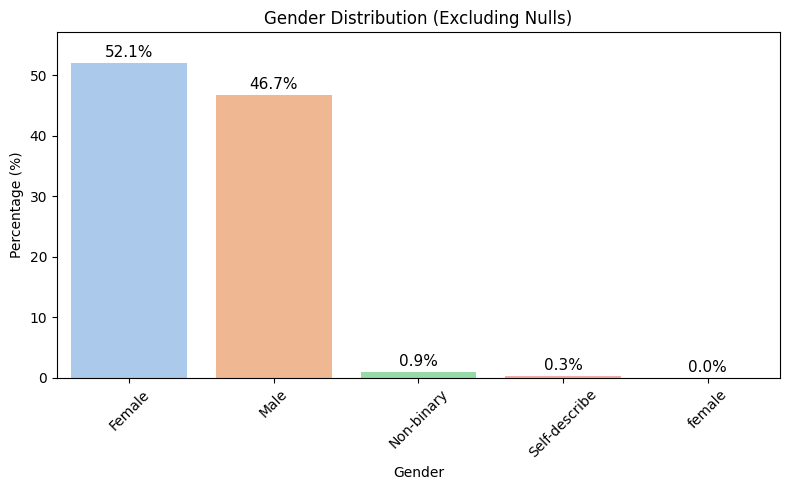

In [38]:
gender_counts = renters['Gender'].dropna().value_counts(normalize=True)

gender_df = gender_counts.reset_index()
gender_df.columns = ['Gender', 'Percentage']
gender_df['Percentage'] = gender_df['Percentage'] * 100  
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='Gender', y='Percentage', data=gender_df, palette='pastel')

for index, row in gender_df.iterrows():
    barplot.text(index, row.Percentage + 0.5, f"{row.Percentage:.1f}%", ha='center', va='bottom', fontsize=11)

plt.ylabel('Percentage (%)')
plt.title('Gender Distribution (Excluding Nulls)')
plt.ylim(0, gender_df['Percentage'].max() + 5)  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Country Distribution

C:\Users\admin\AppData\Local\Temp\ipykernel_12624\940788101.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis', orient='h')


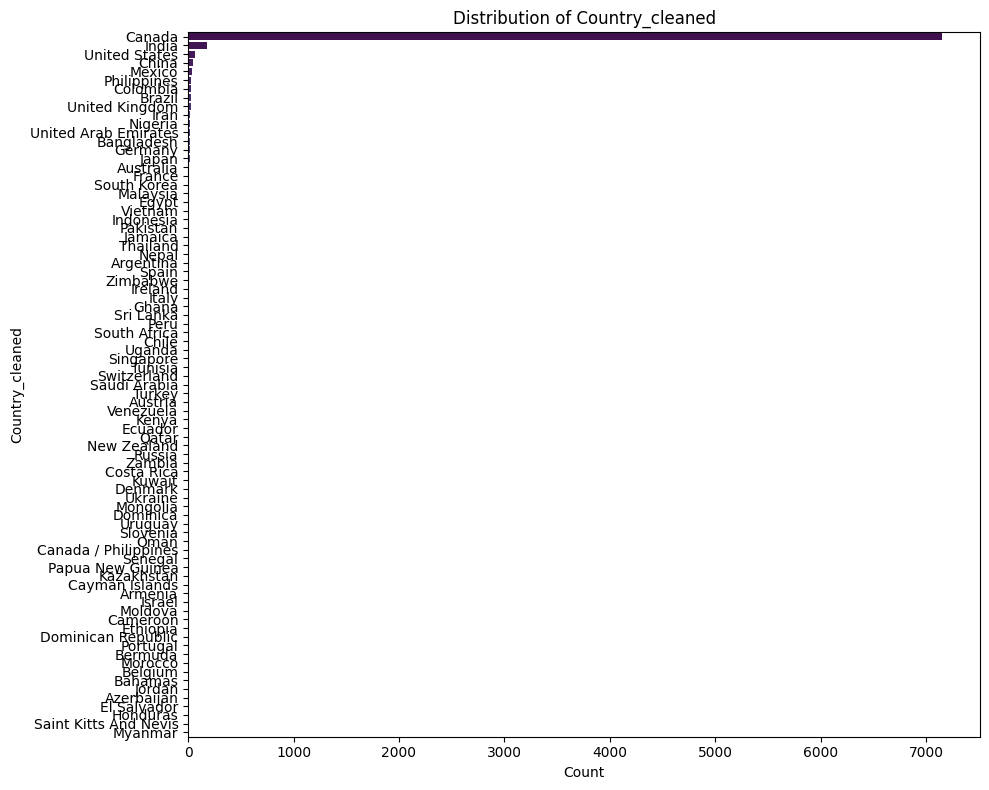

In [39]:
country_counts = renters_country['Country_cleaned'].dropna().value_counts()


plt.figure(figsize=(10, 8))
sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis', orient='h')

plt.title('Distribution of Country_cleaned')
plt.xlabel('Count')
plt.ylabel('Country_cleaned')
plt.tight_layout()
plt.show()

#### Looking in state

C:\Users\admin\AppData\Local\Temp\ipykernel_12624\631043778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=looking_state_counts.index, y=looking_state_counts.values, palette='viridis')


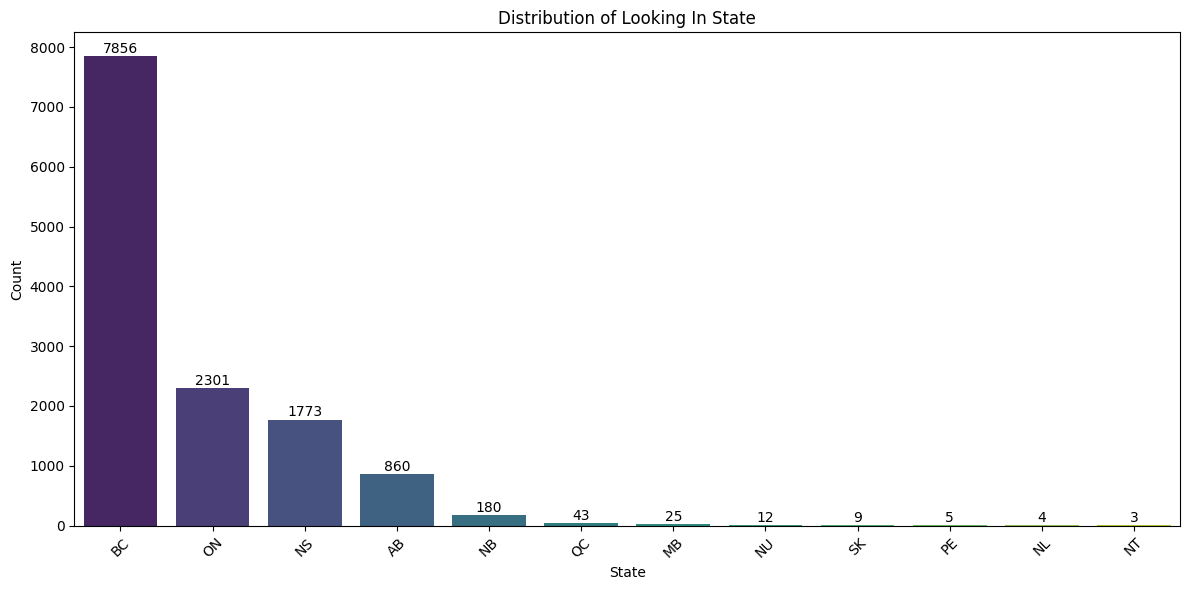

In [40]:
state_filtered = renters[(renters['Looking In State'].notna()) & (renters['Looking In State'] != ' ')]
looking_state_counts = state_filtered['Looking In State'].value_counts()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=looking_state_counts.index, y=looking_state_counts.values, palette='viridis')

for i, count in enumerate(looking_state_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Looking In State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Looking in state & Cities

C:\Users\admin\AppData\Local\Temp\ipykernel_12624\2193288438.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cities, rotation=45, ha='right', fontsize=8)
C:\Users\admin\AppData\Local\Temp\ipykernel_12624\2193288438.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cities, rotation=45, ha='right', fontsize=8)
C:\Users\admin\AppData\Local\Temp\ipykernel_12624\2193288438.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cities, rotation=45, ha='right', fontsize=8)
C:\Users\admin\AppData\Local\Temp\ipykernel_12624\2193288438.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabe

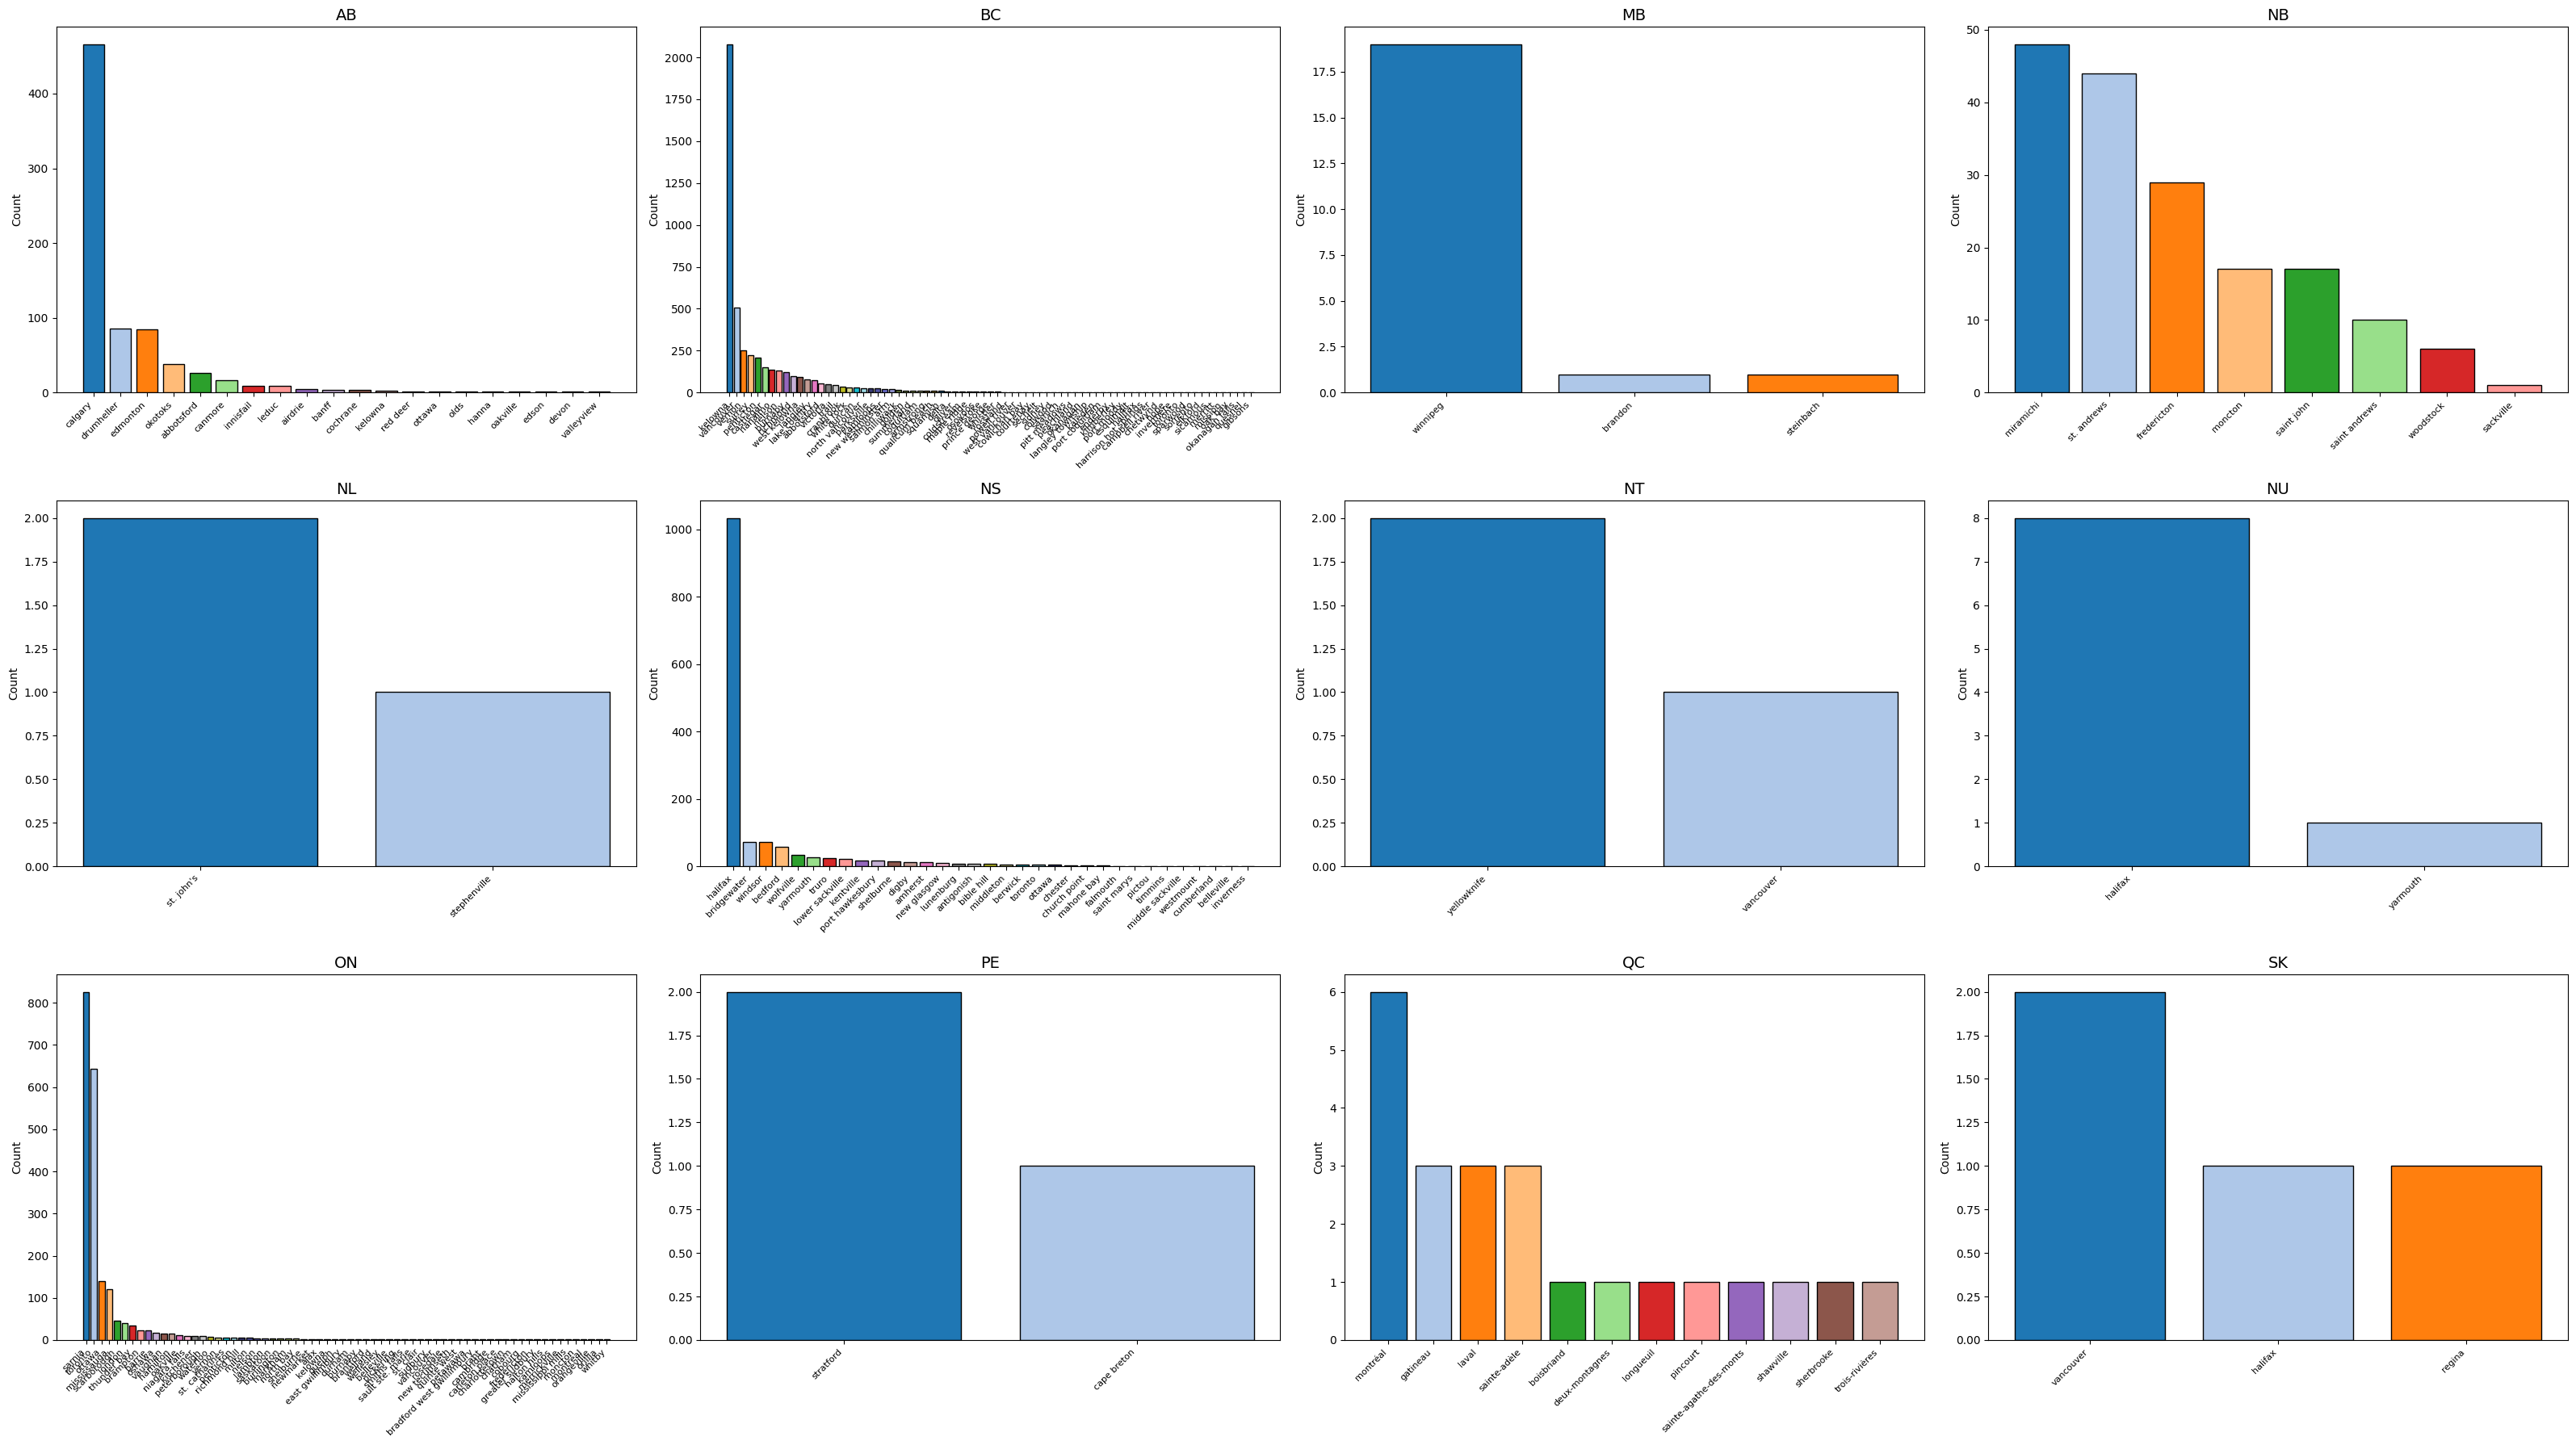

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import math

def get_30_colors():
    cmap1 = plt.get_cmap('tab20')
    cmap2 = plt.get_cmap('tab20b')
    colors = []
    for i in range(10):
        colors.append(cmap1(i))
    for i in range(10, 20):
        colors.append(cmap1(i))
    for i in range(10):
        colors.append(cmap2(i))
    return colors

colors_30 = get_30_colors()

df_filtered = renters[
    (renters['Looking In State'].notna()) & (renters['Looking In State'].str.strip() != '') &
    (renters['Looking In City_extracted'].notna()) & (renters['Looking In City_extracted'].str.strip() != '')
]

state_city_counts = df_filtered.groupby(['Looking In State', 'Looking In City_extracted']).size().reset_index(name='count')
states = state_city_counts['Looking In State'].unique()

n_cols = 4
n_rows = math.ceil(len(states) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6), squeeze=False)
axs = axs.flatten()

for i, state in enumerate(states):
    ax = axs[i]
    subset = state_city_counts[state_city_counts['Looking In State'] == state].sort_values(by='count', ascending=False)
    
    cities = subset['Looking In City_extracted']
    counts = subset['count']
    
    bar_colors = [colors_30[j % len(colors_30)] for j in range(len(cities))]
    
    bars = ax.bar(cities, counts, color=bar_colors, edgecolor='black')
    ax.set_title(f"{state}", fontsize=14)
    ax.set_xticklabels(cities, rotation=45, ha='right', fontsize=8)
    ax.set_ylabel("Count")

for j in range(len(states), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


### Budget Distribution

####

In [42]:
print(renters['Budget'].describe())

count    10233.000000
mean      1097.323170
std        569.314719
min          0.000000
25%        800.000000
50%       1000.000000
75%       1300.000000
max      10000.000000
Name: Budget, dtype: float64


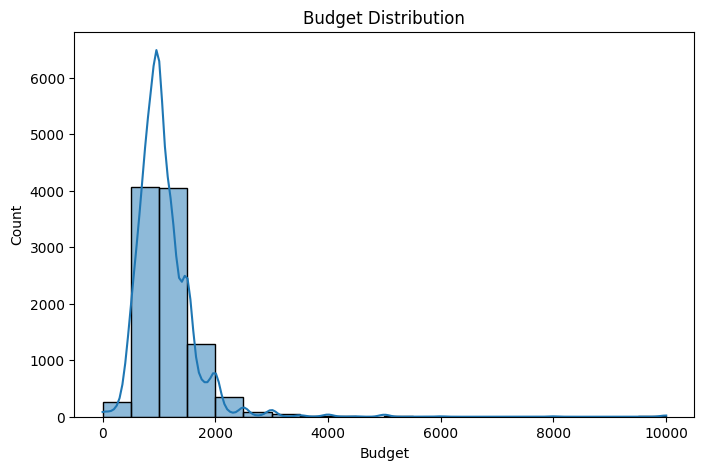

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(renters['Budget'], bins=20, kde=True)
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12624\3993077017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=renters, x='Looking In State', y='Budget', palette='Set3')


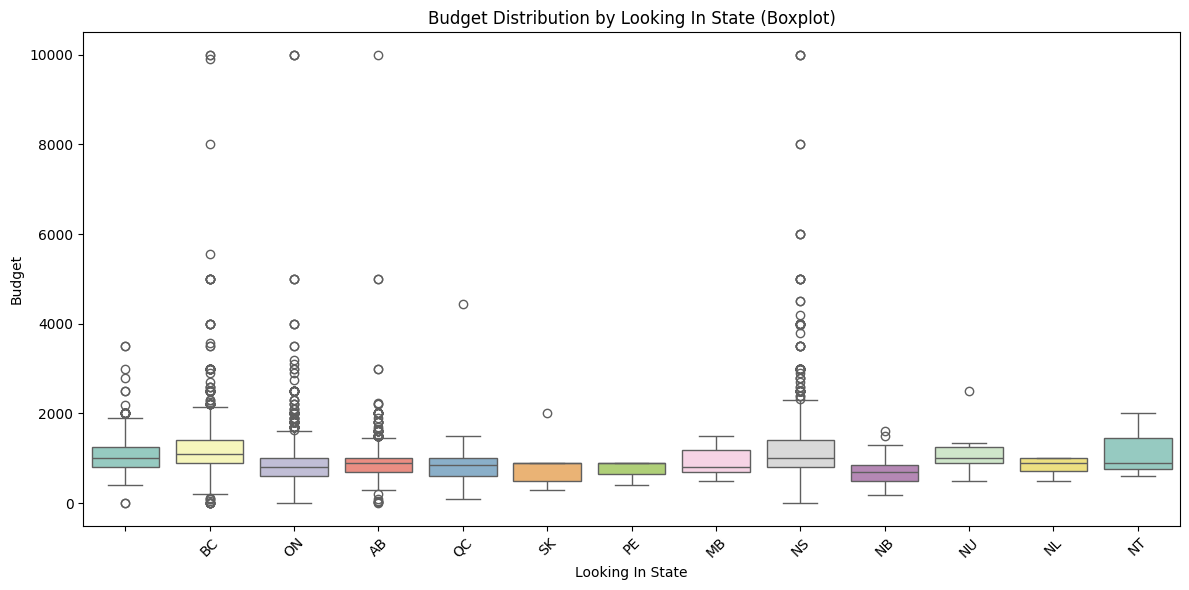

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=renters, x='Looking In State', y='Budget', palette='Set3')
plt.xticks(rotation=45)
plt.title('Budget Distribution by Looking In State (Boxplot)')
plt.xlabel('Looking In State')
plt.ylabel('Budget')
plt.tight_layout()
plt.show()

### Lease Term Distribution

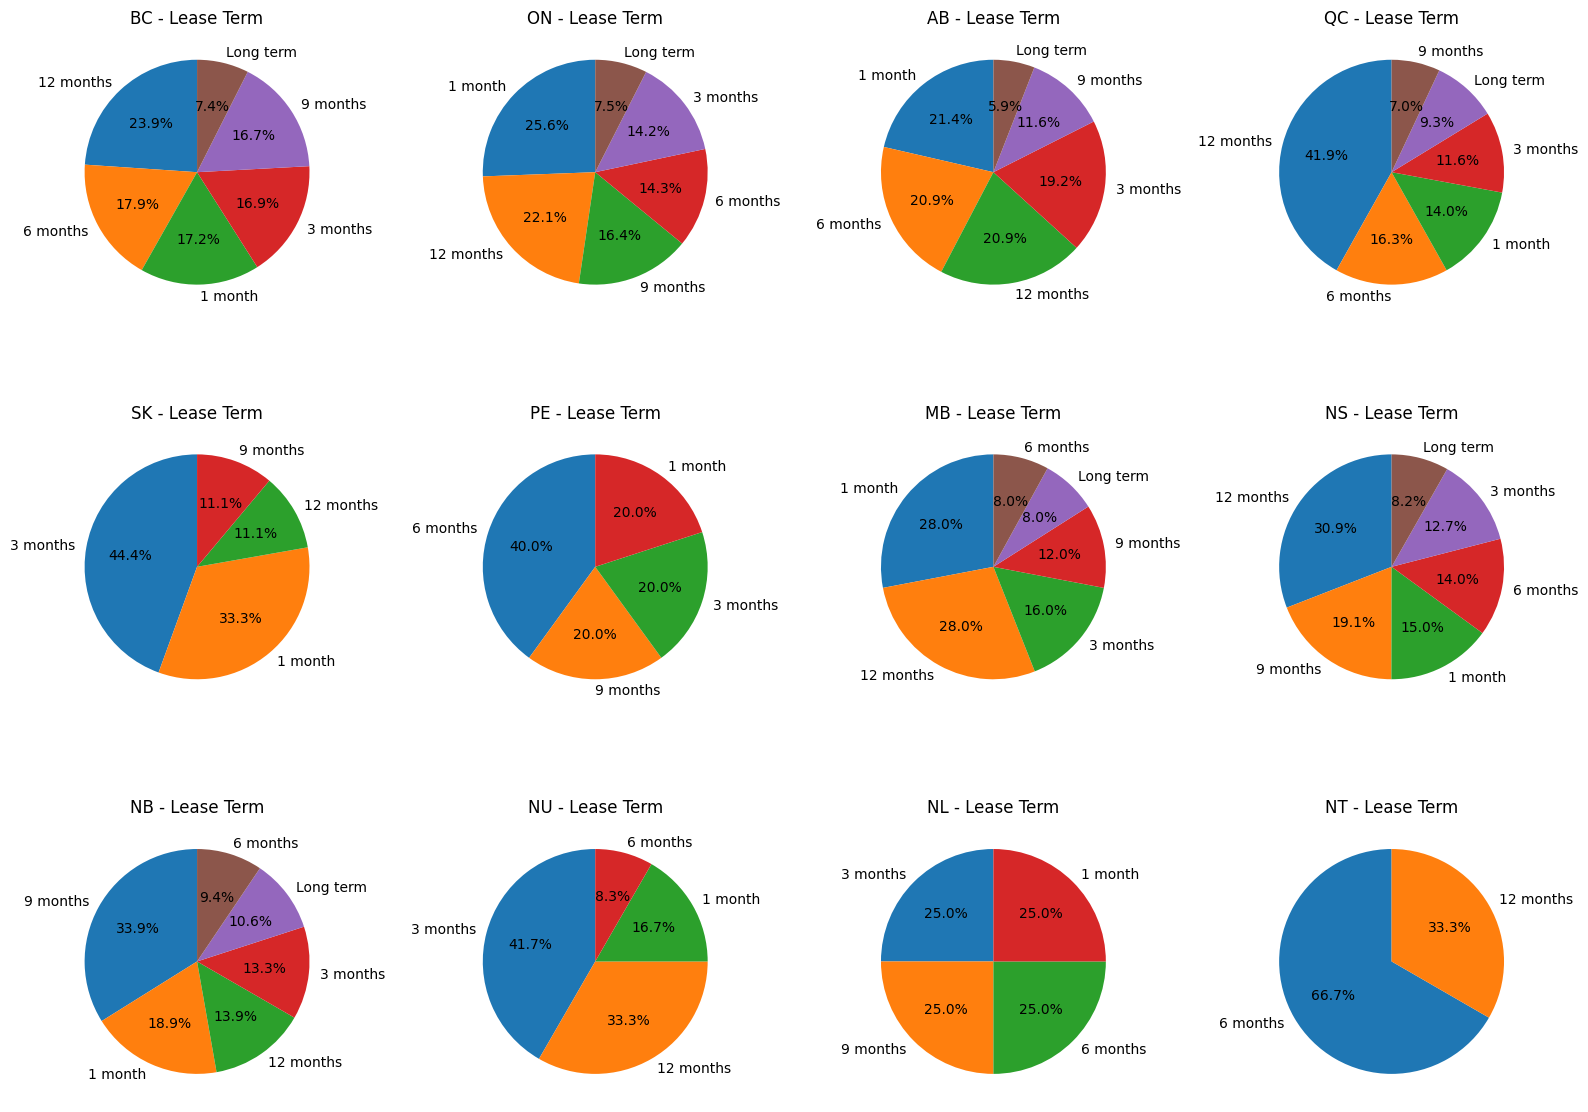

In [45]:
states = renters[(renters['Looking In State'].notna()) & (renters['Looking In State'] != ' ')]['Looking In State'].unique() 
num_states = len(states)

cols = 4
rows = int(np.ceil(num_states / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

axes = axes.flatten()

for i, state in enumerate(states):
    state_data = renters[renters['Looking In State'] == state]
    lease_counts = state_data['Lease Term'].value_counts()

    axes[i].pie(lease_counts, labels=lease_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{state} - Lease Term')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

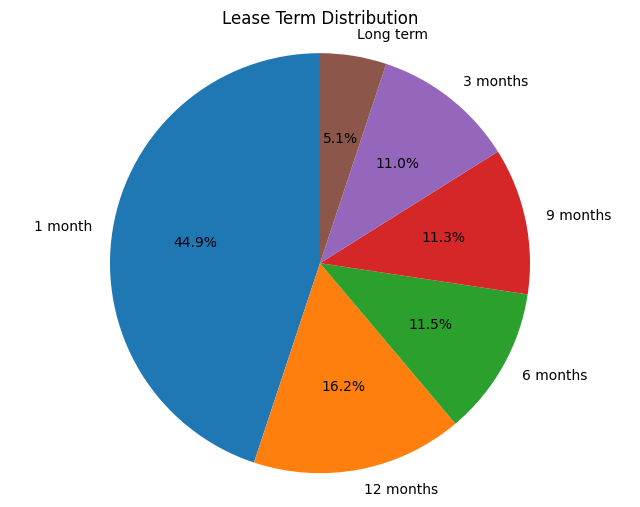

In [46]:
lease_counts = renters['Lease Term'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(lease_counts, labels=lease_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Lease Term Distribution')
plt.axis('equal')  
plt.show()